## Logistic regression
#### np.multiply is the element-wise multiplication (np. multiply and the multiplication operator * work consistently for ndarray objects.), while np.dot is the the dot product of two vectors

Prediction function for logistic regression
$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T x}}
$$
This is the hypothetical function of logistic regression, also named as the prediction function.
In fact, it is to add the sigmoid function to the result of the linear regression function

In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

0.5

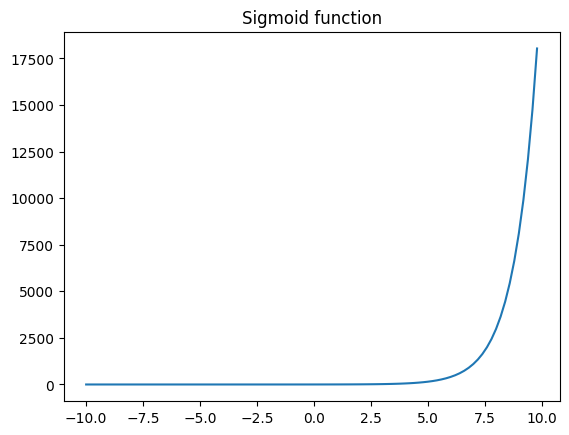

In [21]:
vals = np.arange(-10,10,0.2)
gz= np.e**(vals)
plt.plot(vals, gz)
plt.title('Sigmoid function');


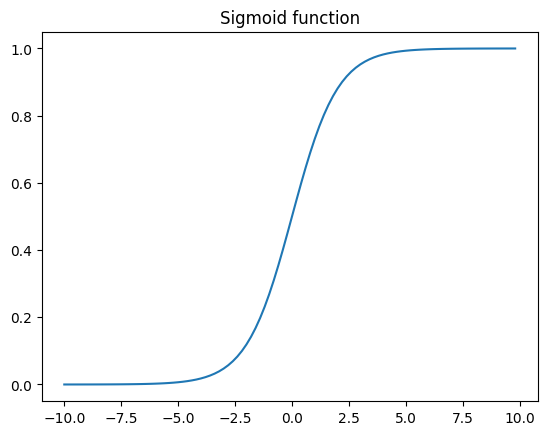

In [23]:
vals = np.arange(-10,10,0.2)
gz= 1/(1+np.e**(0-vals))
plt.plot(vals, gz)
plt.title('Sigmoid function');


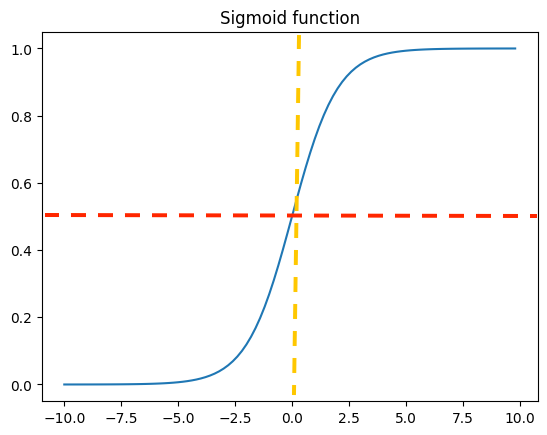

In [11]:
from IPython.display import Image
Image("../output.png", width = 900, height = 400)

The value of h(x) is the probability value that the sample belongs to category 1
$Z = \theta^T x$

Z = 0, the probability is $0.5$ 

Z > 0, the probability is larger than 0.5

Z < 0, the probability is smaller than 0.5

Cost function
$$
\operatorname{Cost}\left(h_\theta, y\right)=\left\{\begin{array}{cl}
-\log \left(h_\theta(x)\right) & \text { if } y=1 \\
-\log \left(1-h_\theta(x)\right) & \text { if } y=0
\end{array}\right.
$$



/var/folders/lr/8bhpw07s3sj177_j2b795vlc0000gn/T/ipykernel_78018/3341210607.py:2: RuntimeWarning: divide by zero encountered in log
  y1vals = 0-np.log(xvals)


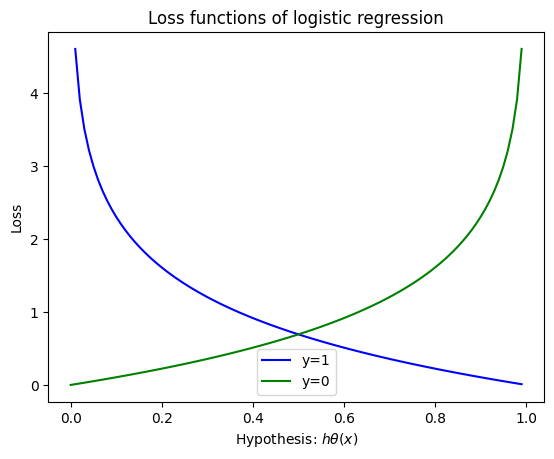

In [6]:
# Plot the cost function for logistic regression
xvals = np.arange(0,1,0.01)
y1vals = 0-np.log(xvals)
y0vals = 0-np.log(1-xvals)
plt.plot(xvals, y1vals, 'b', label='y=1')
plt.plot(xvals, y0vals, 'g', label='y=0')
plt.title('Loss functions of logistic regression')
plt.legend()
plt.xlabel('Hypothesis: $h\\theta(x)$')
plt.ylabel('Loss');

### Cost function
$$
\begin{aligned}
&J(\theta)=\frac{1}{m} \sum_{i=1}^m \operatorname{Cost}\left(h_\theta\left(x^i\right), y^i\right) \\
&=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$
### Pseudo code
`J(theta) = (-1/m)*sum(np.multiply(y, np.log(y_pred)) + np.multiply((1-y), np.log(1-y_pred)))`

We need to minimize the cost/loss function:
Repeat \{
$$
\theta_j:=\theta_j-\alpha \frac{1}{m} \sum_{i=1}^m\left(h_\theta\left(x^i\right)-y^i\right) x_j^i
$$

## Logistic regression regularization
$$
J(\theta)=-\left[\frac{1}{m} \sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]+\frac{\lambda}{2 m} \sum_{j=1}^n \theta_j^2
$$

In [28]:
import numpy as np
class LogisticRegression:
    '''
    default: regularization term =1
    learning_rate: 0.001
    iteration_numbers: 10000
    '''
    def __init__(self, penalty = None, Lambda = 1, lrate = 0.001, epochs = 10000):
        self.W = None
        self.penalty = penalty
        self.Lambda = Lambda
        self.lrate= lrate
        self.epochs = epochs
        self.sigmoid = lambda x:1/(1+ np.exp(-x))
    def loss(self, x, y):
        m = x.shape[0]
        y_pred = self.sigmoid(x * self.W)
        return (-1/m) * np.sum((np.multiply(y, np.log(y_pred)) + np.multiply((1-y), np.log(1-y_pred))))
    def fit(self,x,y):
        lossList = []
        # calculate the number of data samples
        m = x.shape[0]
        X = np.concatenate((np.ones((m,1)), x),axis=1) # (100, 3)
        # calculate the number of features
        n = X.shape[1]
        # reshape the W into a matrix
        self.W = np.mat(np.ones((n,1)))

        XMat = np.mat(X)
        # reshape y as a (m x 1) matrix
        YMat = np.mat(y.reshape(-1,1))
        # for loop
        for i in range(self.epochs):
            h = self.sigmoid(XMat*self.W)
            gradient = XMat.T * (h - YMat)/m

            # add regularization terms
            if self.penalty == 'l2':
                gradient = gradient + self.Lambda * self.W
            elif self.penalty == 'l1':
                gradient = gradient + self.Lambda * np.sign(self.W)
                # np.sign Returns an element-wise indication of the sign of a number

            self.W = self.W - self.lrate * gradient
            if i % 50 == 0:
                lossList.append(self.loss(XMat, YMat))
        return self.W, lossList


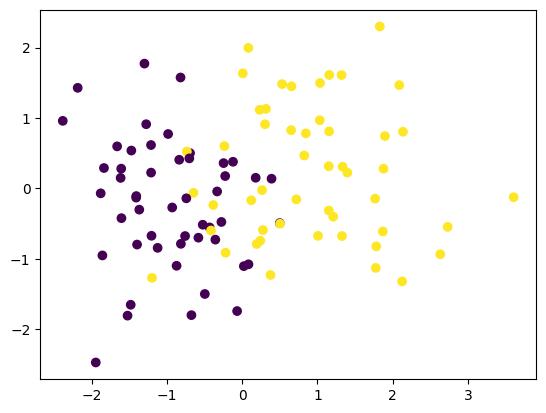

In [29]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

# Generate classification dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)

plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [30]:
x.shape
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

In [5]:
X.shape

(100, 3)

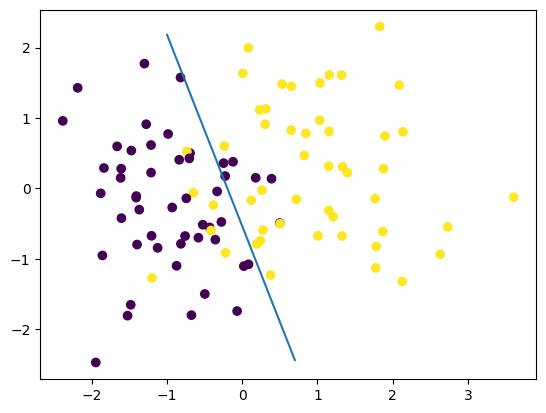

In [31]:
lr = LogisticRegression()
w,lossList = lr.fit(x,y)

#z=0 is the dividing line for linear classification
# w[0]+ x*w[1] + y* w[2]=0, calculate y 
x_test = [[-1],[0.7]]
y_test = (-w[0]-x_test*w[1])/w[2] 

plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_test,y_test)
plt.show()


### Plot the loss

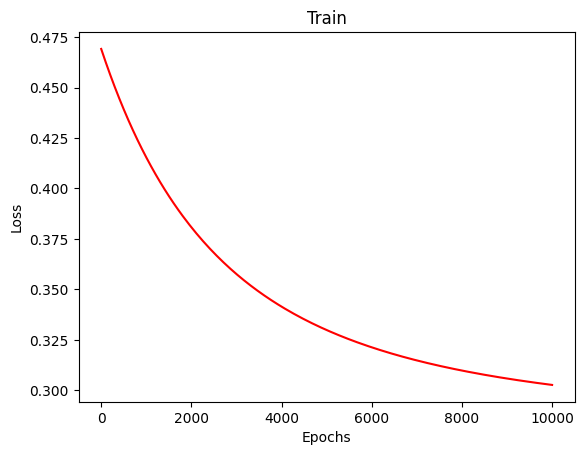

In [7]:
n = np.linspace(0,10000,200)
plt.plot(n,lossList,c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The loss keeps decreasing as the number of iterations increases, but, obviously, the current number of iterations does not make the model parameters converge.

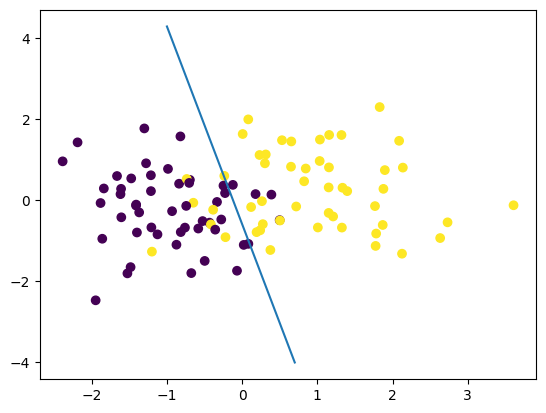

In [44]:
lr = LogisticRegression(epochs=50000)
w,lossList = lr.fit(x,y)

#As mentioned earlier, z=0 is the linear classification critical line

x_test = [[-1],[0.7]]
y_test = (-w[0]-x_test*w[1])/w[2] 

plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_test,y_test)
plt.show()

In [46]:
y_test.shape

(2, 1)

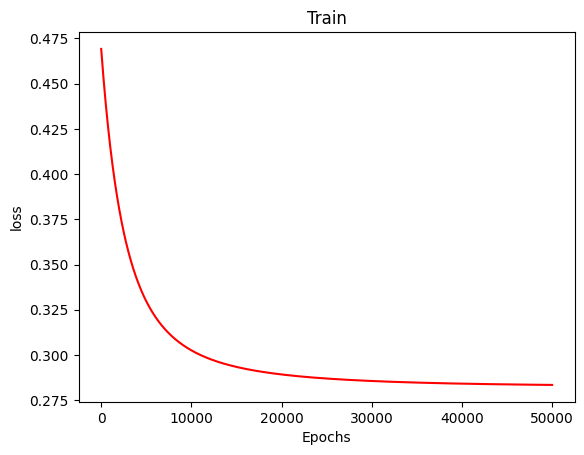

In [33]:
n = np.linspace(0, 50000, 1000)
plt.plot(n, lossList, c = 'r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [34]:
print('Model paramters:\n', w, '\n')
m = x.shape[0]
X = np.concatenate((np.ones((m,1)),x), axis=1)
XMat = np.mat(X)
y_pred = [1 if x >= 0.5 else 0 for x in lr.sigmoid(XMat*w)]
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))


Model paramters:
 [[0.32080482]
 [2.65375501]
 [0.54420912]] 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.92      0.88      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [39]:
from sklearn.linear_model import LogisticRegression as LR
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf = LR(penalty='none') #The default penalty is L2 reg，with C=1，Here C is the reciprocal of the regularization term

clf.fit(x,y)
print('Parameters generate by sklearn lib：\n','coefficients:',clf.coef_,'\n','intercept:',clf.intercept_)

y_pred_1 = clf.predict(x)
print('\n')
print(classification_report(y,y_pred_1))


Parameters generate by sklearn lib：
 coefficients: [[2.88547295 0.54858973]] 
 intercept: [0.37832598]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [43]:
from sklearn.metrics import *
print('y_test:', y_test.shape,'\n')
print('y_pred:', y_pred.shape, '\n')
print('Precision score',np.round(precision_score(y_test,y_pred),2))
print('Recall score',np.round(recall_score(y_test,y_pred),2))
cm_reg = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp_reg = ConfusionMatrixDisplay(confusion_matrix=cm_reg,display_labels=clf.classes_)
disp_reg.plot()
plt.show()

y_test: (30,) 



AttributeError: 'list' object has no attribute 'shape'

- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

- The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.



In [12]:
def calculate_metrics(predicted, actual):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(predicted)):
        if   (predicted[i] == 0) & (actual[i] == 0):
            TP += 1
        elif (predicted[i] == 0) & (actual[i] == 1):
            FP += 1
        elif (predicted[i] == 1) & (actual[i] == 1):
            TN += 1
        else:
            FN += 1

    accuracy  = (TP + TN) / (TP + FP + TN + FN) 
    precision = (TP) / (TP + FP) 
    recall    = (TP) / (TP + FN) 
    f1_score  = (2 * precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score

In [15]:
calculate_metrics(y_pred, y)

(0.9, 0.8846153846153846, 0.92, 0.9019607843137256)

## Comparisons
 * In our python version for logistic regression, larger lambda means the penalty is stronger
 * In sklearn, smaller values of C constrain the model more [link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html)

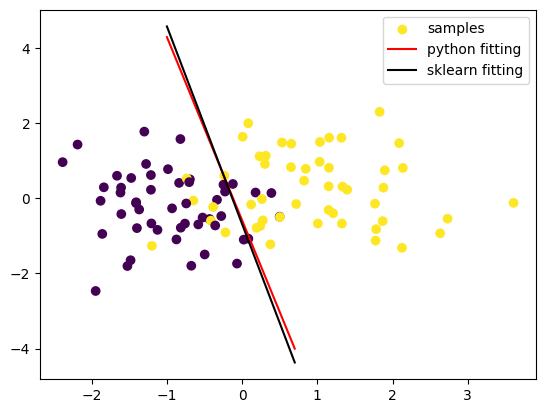

In [13]:
y_test_1 = (-clf.intercept_ - clf.coef_[0][0] * np.array(x_test))/clf.coef_[0][1]

fig =plt.figure()
ax1= fig.add_subplot()
ax1.scatter(x[:,0],x[:,1],c=y,label='samples')

ax1.plot(x_test,y_test,c='r',label='python fitting')
ax1.plot(x_test,y_test_1,c='k',label='sklearn fitting')
plt.legend()
plt.show()
